In [1]:
import networkx as nx
import pynauty as na
import networkx.algorithms.isomorphism as iso
import matplotlib.pyplot as plt
import random
import lift as lt
%matplotlib inline

In [3]:
lift = lt.Lift(nx.star_graph(4), 5)

In [49]:
lt.sample_vertex(lift.graph, lift.vertex_distribution, 50)

4

In [58]:
graph_nodes = lift.sample_unordered_lift(lt.sample_vertex(lift.graph, lift.vertex_distribution, 50), 50)
graph = lt.get_subgraph(lift.graph, graph_nodes)
lt.find_type_match(graph, lift.nx_graphlet_dict, lift.na_graphlet_dict)

(0, {1: 0, 0: 4, 2: 1, 3: 2, 4: 3})

/Users/dmitron/.local/share/virtualenvs/LiftSRW-N3FXcLe1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


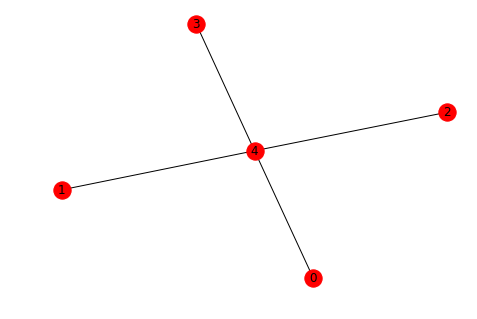

In [63]:
nx.draw(lift.nx_graphlet_dict[5][0], with_labels=True)

/Users/dmitron/.local/share/virtualenvs/LiftSRW-N3FXcLe1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


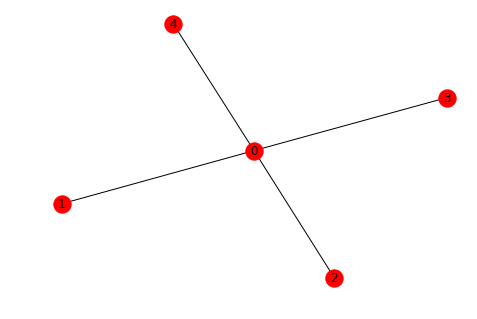

In [61]:
nx.draw(graph, with_labels=True)

In [16]:
lift = lt.Lift(nx.star_graph(4), 3)
#nx.draw(lift.nx_graphlet_dict[3][0])
f = lift.prob_functions[0]
f?

Signature: f(x_0, x_1, x_2)
Docstring:
Created with lambdify. Signature:

func(x_0, x_1, x_2)

Expression:

1/(4*(x_0 + x_2 - 2)) + 1/(4*(x_0 + x_1 - 2))

Source code:

def _lambdifygenerated(x_0, x_1, x_2):
    return ((1/4)/(x_0 + x_2 - 2) + (1/4)/(x_0 + x_1 - 2))


Imported modules:
File:      ~/Documents/GradSchool/GraphletLift/code/LiftSRW/<lambdifygenerated-32>
Type:      function


In [19]:
for graph in lift.nx_graphlet_dict[3]:
    (ind, match) = lt.find_type_match(graph, lift.nx_graphlet_dict, lift.na_graphlet_dict)
    print(lt.get_degree_list(nx.star_graph(4), match))


[4, 1, 1]
[4, 1, 1]


In [20]:
f(*[4,1,1])

0.16666666666666666

In [24]:
lift.graphlet_count(50)

{'wedge': 6, 'triangle': 0}

### Initial tests for pynauty isomorphism.

In [2]:
g = na.Graph(number_of_vertices=8, directed=False,
          adjacency_dict = { 0: [1,2],
                             1: [0,4],
                             2: [0,3,4,5],
                             3: [2,4,5,6],
                             4: [1,2,3,5],
                             5: [4,2,3,7],
                             6: [3,7],
                             7: [5,6] })

h = na.Graph(number_of_vertices=8, directed=False,
          adjacency_dict = { 0: [1,2],
                             1: [0,4],
                             2: [0,3,4,5],
                             3: [2,4,5,7],
                             4: [1,2,3,5],
                             5: [4,2,3,6],
                             6: [5,7],
                             7: [3,6] })

i = na.Graph(number_of_vertices=8, directed=False,
          adjacency_dict = { 0: [2,4,3,6],
                             1: [5,4],
                             2: [0,3,4,5],
                             3: [0,2,4,7],
                             4: [0,1,2,3],
                             5: [1,2],
                             6: [0,7],
                             7: [3,6] })

j = na.Graph(number_of_vertices=8, directed=False,
          adjacency_dict = { 0: [1,2],
                             1: [0,3],
                             2: [0,3,4,5],
                             3: [1,2,4,5],
                             4: [2,3,5,6],
                             5: [2,3,4,5,6,7],
                             6: [4,5,7],
                             7: [5,6] })

print("g = h? ", na.certificate(g) == na.certificate(h), 
      "g = i? ", na.certificate(g) == na.certificate(i), 
      "g = h? ", na.certificate(g) == na.certificate(j))

num_graphs = 4
random_nx_graphs = [nx.gnp_random_graph(8,0.4) for i in range(num_graphs)]
random_na_graphs = [na.Graph(number_of_vertices = 8, 
                             directed = False,
                             adjacency_dict = {n: list(nbrdict.keys()) 
                                               for n, nbrdict in graph.adjacency()}) 
                    for graph in random_nx_graphs]

nx_iso = [nx.is_isomorphic(random_nx_graphs[i],random_nx_graphs[j]) 
          for i in range(num_graphs) for j in range(i,num_graphs)]
na_iso = [na.certificate(random_na_graphs[i]) == na.certificate(random_na_graphs[j]) 
          for i in range(num_graphs) 
          for j in range(i,num_graphs)]

print("Are the isomorphisms the same? ", nx_iso == na_iso)

g = h?  True g = i?  True g = h?  False
Are the isomorphisms the same?  True


### Here we see a 5x speed gain with pynauty.

In [101]:
num_graphs = 1000
graph_size = 3
random_nx_graphs = [ nx.gnp_random_graph(graph_size,0.6) for i in range(num_graphs) ]
random_na_graphs = [ na.Graph(number_of_vertices = graph_size, directed = False,
                              adjacency_dict = { n: list(nbrdict.keys()) for n, nbrdict in graph.adjacency() }
                              ) for graph in random_nx_graphs
                   ]

In [102]:
%%time
nx_iso = [nx.is_isomorphic(random_nx_graphs[i],random_nx_graphs[j]) 
          for i in range(num_graphs) 
          for j in range(i,num_graphs)]

CPU times: user 32.1 s, sys: 186 ms, total: 32.3 s
Wall time: 32.9 s


In [103]:
%%time
na_iso = [na.certificate(random_na_graphs[i]) == na.certificate(random_na_graphs[j]) 
          for i in range(num_graphs) 
          for j in range(i,num_graphs)]

CPU times: user 3.84 s, sys: 32.3 ms, total: 3.87 s
Wall time: 4.02 s


### Here we show that simply using pynauty to do isomorphism gets a 4x speedup over Kirill's code.

In [3]:
def find_type_match(graph, graphlet_list):
    """
    Given a graph, find an isomorphism with one of the canonical graphs from
    'graphlet_list'.
    Return index of the corresponding graph from 'graphlet_list' and a
    match dictionary.
    The match dictionary has format {u_i: v_i}, 'u_i' are nodes from 'graph'
    and 'v_i' are nodes from canonical graph.
    Helper function for 'prob_functions' for unordered method.
    """
    nodes = graph.nodes()
    n = len(nodes)
    if n == 1:
        # trivial graph: just send it to zero!
        return (0, {u: 0 for u in nodes})
    if n == 2:
        # 2-path graph: both nodes are equal, pick a random isomorphism
        return (0, {u: i for i, u in enumerate(nodes)})
    if n == 3:
        if graph.number_of_edges() == 2:
            # wedge-graph: find root, other two are arbitrary
            u0 = next((node for node in nodes if graph.degree(node) == 2))
            (u1, u2) = (node for node in graph.neighbors(u0))
            return (0, {u0: 0, u1: 1, u2: 2})
        if graph.number_of_edges() == 3:
            # triangle: all three are arbitrary
            return (1, {u: i for i, u in enumerate(nodes)})
    if n == 4:
        e_num = graph.number_of_edges()
        max_degree = max((graph.degree(node) for node in nodes))
        if e_num == 3 and max_degree == 3:
            u3 = next((node for node in nodes if graph.degree(node) == 3))
            (u0, u1, u2) = tuple(graph.neighbors(u3))
            return (0, {u0: 0, u1: 1, u2: 2, u3: 3})
        if e_num == 3 and max_degree == 2:
            (u0, u1) = (node for node in nodes if graph.degree(node) == 2)
            u2 = next((node for node in graph.neighbors(u1) if node != u0))
            u3 = next((node for node in graph.neighbors(u0) if node != u1))
            return (1, {u0: 0, u1: 1, u2: 2, u3: 3})
        if e_num == 4 and max_degree == 3:
            u3 = next((node for node in nodes if graph.degree(node) == 3))
            (u1, u2) = (node for node in nodes if graph.degree(node) == 2)
            u0 = next((node for node in nodes if graph.degree(node) == 1))
            return (2, {u0: 0, u1: 1, u2: 2, u3: 3})
        if e_num == 4 and max_degree == 2:
            u0 = next((node for node in nodes))
            (u1, u3) = tuple(graph.neighbors(u0))
            u2 = next((node for node in graph.neighbors(u1) if node != u0))
            return (3, {u0: 0, u1: 1, u2: 2, u3: 3})
        if e_num == 5:
            (u0, u2) = (node for node in nodes if graph.degree(node) == 3)
            (u1, u3) = (node for node in nodes if graph.degree(node) == 2)
            return (4, {u0: 0, u1: 1, u2: 2, u3: 3})
        if e_num == 6:
            (u0, u1, u2, u3) = tuple(nodes)
            return (5, {u0: 0, u1: 1, u2: 2, u3: 3})
        raise ValueError("wrong graphlet format")

    # Improve matching procedure here for n>4.
    for (i, graph_) in enumerate(graphlet_list):
        graph_matcher = iso.GraphMatcher(graph, graph_)
        if graph_matcher.is_isomorphic():
            break
    #assert graph_id[1].is_isomorphic()
    return (i, graph_matcher.mapping)

def get_graphlet_list(k):
    """
    Generate list of all graphlets of size 'k'.
    List is taken from graph_atlas of networkx.
    """
    from networkx.generators.atlas import graph_atlas_g
    assert k > 0
    atlas = graph_atlas_g()[1:]
    graphlet_list = []
    for graph in atlas:
        n = graph.number_of_nodes()
        if n < k:
            continue
        if n > k:
            break
        if nx.is_connected(graph):
            graphlet_list.append(graph)
    return graphlet_list

def nxgraph_to_nagraph(nxgraph):
    return na.Graph(number_of_vertices = graphlet_size, 
                    directed = False,
                    adjacency_dict = { n: list(nbrdict.keys()) 
                                       for n, nbrdict in nxgraph.adjacency() }
                    )

def find_type_match2(graph, na_graphlet_list, nx_graphlet_list):
    import networkx.algorithms.isomorphism as iso
    
    for i, graph2 in enumerate(na_graphlet_list):
        if na.certificate(graph) == na.certificate(graph2):
            break
    
    G1 = nx.from_dict_of_lists(graph.adjacency_dict)
    G2 = nx_graphlet_list[i]
    matcher = iso.GraphMatcher(G1, G2)
    mapping = next(matcher.match())
    return (i, mapping)

In [117]:
graphlet_size = 5
nx_graphlet_list = get_graphlet_list(graphlet_size)
na_graphlet_list = [ nxgraph_to_nagraph(graph) for graph in nx_graphlet_list ]
num_graphs = 500
random_nx_graphs = [ random.choice(nx_graphlet_list) for i in range(num_graphs) ]
random_na_graphs = [ nxgraph_to_nagraph(graph) for graph in random_nx_graphs ]

In [118]:
%%time
nx_types = [ find_type_match(graph, nx_graphlet_list) for graph in random_nx_graphs ]

CPU times: user 489 ms, sys: 8.57 ms, total: 498 ms
Wall time: 532 ms


In [119]:
%%time
na_types = [ find_type_match2(graph, na_graphlet_list, nx_graphlet_list) for graph in random_na_graphs ]

CPU times: user 267 ms, sys: 5.12 ms, total: 272 ms
Wall time: 292 ms


In [97]:
for i, graph2 in enumerate(na_graphlet_list):
    if na.certificate(random_na_graphs[0]) == na.certificate(graph2):
        break
G1 = nx.from_dict_of_lists(random_na_graphs[0].adjacency_dict)
G2 = nx_graphlet_list[i]
find_type_match2(random_na_graphs[0], na_graphlet_list, nx_graphlet_list)
print(iso.is_isomorphic(G1, G2))

True


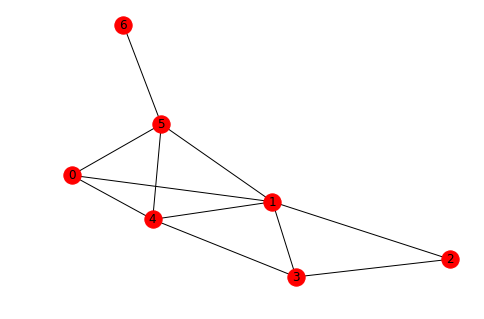

In [98]:
nx.draw(G1,with_labels=True)

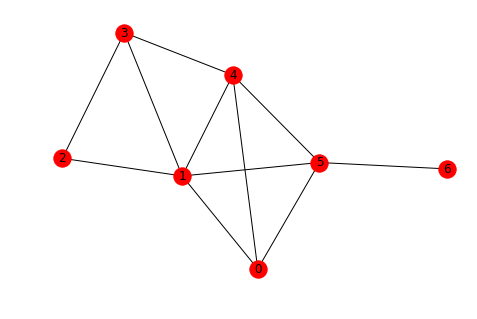

In [99]:
nx.draw(G2,with_labels=True)

# Creating a dictionary out of graph data.

In [4]:
def adjacency_to_nagraph(adjacency):
    return na.Graph(number_of_vertices = len(adjacency.keys()),
                    adjacency_dict = adjacency)

def nxgraph_to_relabeled_nagraph(graph):
    node_mapping = { node: i for (i, node) in enumerate(graph.nodes()) }
    graph_dict_mapped = { node_mapping[node] : [ node_mapping[node2] 
                                                 for node2 in graph.neighbors(node) ] 
                          for node in graph.nodes() }
    return adjacency_to_nagraph(graph_dict_mapped)

In [ ]:
graph = nx.read_edgelist(
                'Graphs/bio-celegansneural.mtx',
                create_using=nx.Graph(), data=(('weight', float),))

na_graph = nxgraph_to_relabeled_nagraph(graph)

# Test networkx subgraphing.

In [2]:
def remove_self_loops(graph):
    """
    Removes self loops from a graph.

    Trusted - DS.
    """
    for node in graph.nodes():
        if graph.has_edge(node, node):
            graph.remove_edge(node, node)

def get_subgraph(graph, nodes):
    """
    Manually constructs the induced subgraph given a list of nodes from the full graph.
    Returns a new networkx graph object.
    Helper function for shotgun method and probability functions in the unordered method.

    NOTE:
        We use this because the networkx subgraph method is very slow.
    """
    list_nodes = list(nodes)
    subgraph = nx.Graph()
    subgraph.add_nodes_from(nodes)
    for i, node in enumerate(list_nodes):
        neighbors = list(graph.neighbors(node))
        for j in range(i+1, len(list_nodes)):
            if list_nodes[j] in neighbors:
                subgraph.add_edge(node, list_nodes[j])
    return subgraph

### Let's test the equivalence of Kirill's code and NetworkX subgraph.

In [6]:
graph = nx.read_edgelist(
                'Graphs/misc-fullb.mtx',
                create_using=nx.Graph(), data=(('weight', float),))
remove_self_loops(graph)

n = 1000
k = 5
lift_unordered = lt.Lift(graph,k)
vertex_sets = [ lift_unordered.sample_graphlet(lift_unordered.sample_vertex(5),5) for j in range(n) ]

In [7]:
nx_subg = [ nx.to_dict_of_dicts(graph.subgraph(vertex_set)) for vertex_set in vertex_sets ]
k_subg = [ nx.to_dict_of_dicts(get_subgraph(graph, vertex_set)) for vertex_set in vertex_sets ]

In [8]:
print(nx_subg[0] == k_subg[0])
print(nx_subg[0])
print(k_subg[0])
print(all([ nx_subg[i] == k_subg[i] for i in range(n) ]))

True
{'7339': {'7342': {}, '7347': {}, '22098': {}, '174220': {}}, '7342': {'7339': {}, '7347': {}, '22098': {}, '174220': {}}, '174220': {'7339': {}, '7342': {}}, '7347': {'7339': {}, '7342': {}, '22098': {}}, '22098': {'7339': {}, '7342': {}, '7347': {}}}
{'7339': {'7342': {}, '174220': {}, '7347': {}, '22098': {}}, '7342': {'7339': {}, '174220': {}, '7347': {}, '22098': {}}, '174220': {'7339': {}, '7342': {}}, '7347': {'7339': {}, '7342': {}, '22098': {}}, '22098': {'7339': {}, '7342': {}, '7347': {}}}
True


### Now let's test the timing. (Kirill's claim that subgraph is slow doesn't hold up.)
Getting contradictory results here.

In [36]:
%%timeit
nx_subg = [ graph.subgraph(vertex_set) for vertex_set in vertex_sets ]

33.8 ms ± 11.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
%%timeit
k_subg = [ get_subgraph(graph, vertex_set) for vertex_set in vertex_sets ]

113 ms ± 42.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
graph = nx.read_edgelist(
                'Graphs/misc-polblogs.mtx',
                create_using=nx.Graph(), data=(('weight', float),))
remove_self_loops(graph)

n = 20
k = 5
lift_unordered = lt.Lift(graph,k)
vertex_sets = [ lift_unordered.sample_graphlet(lift_unordered.sample_vertex(5),5) for j in range(n) ]

In [39]:
%%timeit
nx_subg = [ graph.subgraph(vertex_set) for vertex_set in vertex_sets ]

219 µs ± 30.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
%%timeit
k_subg = [ get_subgraph(graph, vertex_set) for vertex_set in vertex_sets ]

1.1 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Testing degree lists.

In [3]:
graph = nx.read_edgelist(
                'Graphs/misc-polblogs.mtx',
                create_using=nx.Graph(), data=(('weight', float),))
remove_self_loops(graph)

n = 20
k = 5
lift_unordered = lt.Lift(graph,k)
vertex_sets = [ lift_unordered.sample_graphlet(lift_unordered.sample_vertex(5),5) for j in range(n) ]

In [5]:
lt.get_degree_list(graph, vertex_sets[0])

AttributeError: 'set' object has no attribute 'items'

### The different results of the two methods to subgraph leads me to believe that there is difference in the networkx objects created by the two methods that don't show up when converting to a dict.

In [59]:
i = 13
nx_subg[i].edges()

EdgeView([('588', '514'), ('588', '296'), ('296', '535'), ('296', '1179'), ('1179', '535'), ('514', '535')])

In [60]:
k_subg[i].edges()

EdgeView([('588', '296'), ('588', '514'), ('296', '1179'), ('296', '535'), ('1179', '535'), ('514', '535')])

### Here we test the path_graph wedge counts, which were breaking when I changed the subgraph code. I found that prob functions were getting different coefficients.

In [19]:
lift_unordered_nx = lt.Lift(nx.path_graph(5), 3, subgraph_method="nx")
print(lift_unordered_nx.graphlet_count(3000)['wedge'])
print(lift_unordered_nx.exp_counter)
f_nx = lift_unordered_nx.prob_functions[0]

2
{0: 5283.733333333374, 1: 0}


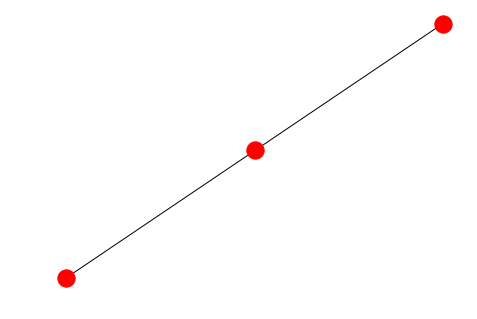

In [20]:
nx.draw(lift_unordered_nx.graphlet_list[3][0])

In [10]:
f_nx?

Signature: f_nx(x_0, x_1, x_2)
Docstring:
Created with lambdify. Signature:

func(x_0, x_1, x_2)

Expression:

1/(2*(x_1 + x_2 - 2)) + 1/(4*(x_0 + x_1 - 2))

Source code:

def _lambdifygenerated(x_0, x_1, x_2):
    return ((1/2)/(x_1 + x_2 - 2) + (1/4)/(x_0 + x_1 - 2))


Imported modules:
File:      ~/Documents/GradSchool/GraphletLift/code/LiftSRW/<lambdifygenerated-22>
Type:      function


In [21]:
lift_unordered_k = lt.Lift(nx.path_graph(5), 3, subgraph_method="k")
print(lift_unordered_k.graphlet_count(3000)['wedge'])
print(lift_unordered_k.exp_counter)
f_k = lift_unordered_k.prob_functions[0]

3
{0: 8982.666666666784, 1: 0}


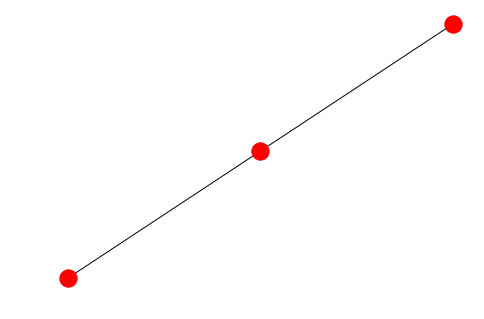

In [23]:
nx.draw(lift_unordered_k.graphlet_list[3][0])

In [12]:
f_k?

Signature: f_k(x_0, x_1, x_2)
Docstring:
Created with lambdify. Signature:

func(x_0, x_1, x_2)

Expression:

1/(4*(x_0 + x_2 - 2)) + 1/(4*(x_0 + x_1 - 2))

Source code:

def _lambdifygenerated(x_0, x_1, x_2):
    return ((1/4)/(x_0 + x_2 - 2) + (1/4)/(x_0 + x_1 - 2))


Imported modules:
File:      ~/Documents/GradSchool/GraphletLift/code/LiftSRW/<lambdifygenerated-24>
Type:      function


### Here I started to unpack prob functions and rewrite it.

In [53]:
def prob_functions():
        """
        Construct sympy formulas for graphlet distributions in unordered
        method.
        'k' is the number of nodes in graphlets,
        'vertex distribution' is a sympy formula for the distribution of
        initial vertex.
        Variable 'x_i' corresponds to the degree of i-th node in the graphlet.
        The ordering of nodes in graphlets is the same as in 'graphlet_list'.
        Returns a dictionary {ind: probability}, with 'ind' being the index of
        the graphlet in 'graphlet_list'.
        EXAMPLE:
            >prob_functions(graph, 3)
            {0: 0.001/(x_0 + x_2 - 2) + 0.001/(x_0 + x_1 - 2),
             1: 0.002/(x_1 + x_2 - 2) + 0.002/(x_0 + x_2 - 2) +
                0.002/(x_0 + x_1 - 2)}

        Helper function for the unordered method.
        """
        k = self.k
        x = { n: sympy.var('x_{}'.format(n)) for n in range(k+1) }
        y = { n: sympy.var('y_{}'.format(n)) for n in range(k+1) }
        graphlet_prob = {0: self.vertex_prob_sympy()}
        for n in range(2, k+1):
            subgraph_prob_weight = graphlet_prob
            graphlet_prob = {}
            for graph_ind, graph in enumerate(self.get_graphlet_list(n)):
                graphlet_prob[graph_ind] = 0
                for u in graph.nodes():
                    # We sum the conditional probabilities P(S)*P(T|S) for each
                    # connected subgraph S of T.
                    subgraph = self.get_subgraph(graph, graph.nodes()-{u})
                    if not nx.is_connected(subgraph):
                        continue
                    subgraph_ind, subgraph_match = self.find_type_match(subgraph, self.graphlet_list)
                    subgraph_prob = (subgraph_prob_weight[subgraph_ind]
                                     .subs({x[i]: y[i] for i in range(n-1)})
                                     .subs({y[j]: x[i] for i, j in
                                            subgraph_match.items()}))
                    subgraph_deg = (sum(x[i] for i in subgraph.nodes()) -
                                    2 * subgraph.number_of_edges())
                    graphlet_prob[graph_ind] += (subgraph_prob *
                                                 graph.degree(u) / subgraph_deg)
        return graphlet_prob

In [86]:
import sympy 

k = 3
x = { n: sympy.var('x_{}'.format(n)) for n in range(k+1) }
y = { n: sympy.var('y_{}'.format(n)) for n in range(k+1) }
graphlet_prob = {0: lift_unordered.vertex_prob_sympy()}
n=2

graph = nx.path_graph(5)
lift_unordered = lt.Lift(graph,3)
subgraph = lift_unordered.get_subgraph(graph,lift_unordered.get_graphlet_list(2)[0].nodes() - {0})
subgraph_ind, subgraph_match = lift_unordered.find_type_match(subgraph, lift_unordered.graphlet_list)

subgraph_prob_weight = graphlet_prob

In [92]:
subgraph_prob = subgraph_prob_weight[subgraph_ind].subs({x[i]: y[i] for i in range(n-1)}).subs({y[j]: x[i] for i, j in subgraph_match.items()})

In [95]:
sum(x[i] for i in subgraph.nodes()) - 2 * subgraph.number_of_edges()

x_1

In [100]:
dict([ (5-i,3+i) for i in range(10) ]).items()

dict_items([(5, 3), (4, 4), (3, 5), (2, 6), (1, 7), (0, 8), (-1, 9), (-2, 10), (-3, 11), (-4, 12)])

In [122]:
lift_unordered.prob_functions[0](*[1,2,3])

0.375